In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2 #for image processing
import easygui #to open filebox
import imageio #read image stored at particular path
import os
import sys
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [3]:
def cartoonify(imagePath):
    originalImage = cv2.imread(imagePath) #read the image
    originalImage = cv2.cvtColor(originalImage,cv2.COLOR_BGR2RGB)
    
# confirm that image is chosen
    if originalImage is None:
        print("Could not find image")
        sys.exit()
    
    ResizeImage1 = cv2.resize(originalImage,(960, 540))

# Transforming an image to grayscale    
    grayScaleImage = cv2.cvtColor(originalImage,cv2.COLOR_BGR2GRAY)
    ResizeImage2 = cv2.resize(grayScaleImage, (960,540))

# Smoothening the image
    
    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ResizeImage3 = cv2.resize(smoothGrayScale, (960,540))

#Retrieving the edges for cartoon effect
    
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,9)
    ResizeImage4 = cv2.resize(getEdge, (960,540))

#Preparing a Mask Image

    #applying bilateral filter to remove noise and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalImage, 9, 300,300)
    ResizeImage5 = cv2.resize(colorImage, (960,540))

#Giving a Cartoon Effect

    cartoonImage = cv2.bitwise_and(colorImage,colorImage,mask = getEdge)
    ResizeImage6 = cv2.resize(cartoonImage, (960,540))

# Plotting the whole transition

    images=[ResizeImage1, ResizeImage2, ResizeImage3, ResizeImage4, ResizeImage5, ResizeImage6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    
    plt.show()

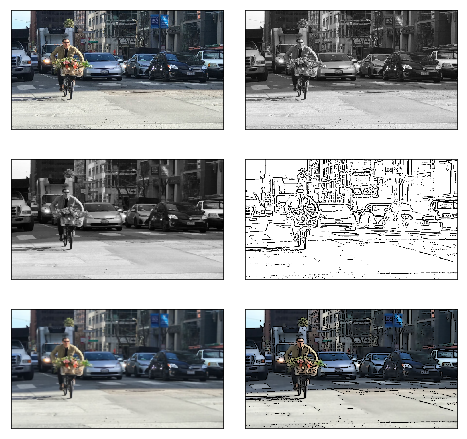

In [6]:
imagePath = 'image1.jpeg'
cartoonify(imagePath)